In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.power import TTestIndPower
from statsmodels.stats.proportion import proportions_ztest,proportion_confint

In [2]:
data = pd.read_csv("ab_data.csv")
data.head(5)

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [3]:
print("Data Shape:", data.shape)
print("\nColumns:\n", data.columns)
print("\nMissing Values:\n", data.isnull().sum())

Data Shape: (294478, 5)

Columns:
 Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

Missing Values:
 user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64


In [4]:
data.duplicated()


0         False
1         False
2         False
3         False
4         False
          ...  
294473    False
294474    False
294475    False
294476    False
294477    False
Length: 294478, dtype: bool

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
old = data[data['group'] == 'control']['converted'].sum()
new = data[data['group'] == 'treatment']['converted'].sum()
n_old = data[data['group'] == 'control'].shape[0]
n_new = data[data['group'] == 'treatment'].shape[0]

In [7]:
z_score, p_value = proportions_ztest(
    [new, old],
    [n_new, n_old],
    alternative='larger'   # one-tailed test
)

print(f"Z-score: {z_score:.2f}, p-value: {p_value:.6f}")

Z-score: -1.24, p-value: 0.891942


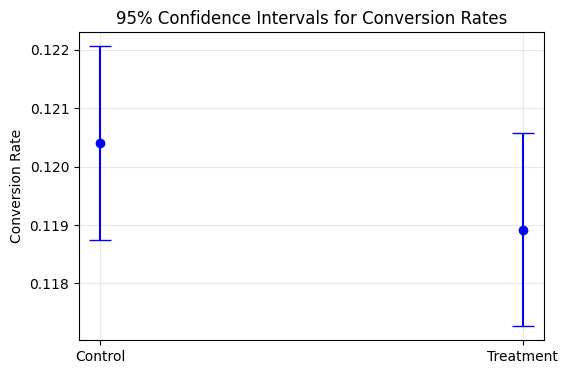

In [8]:
ci_old = proportion_confint(old, n_old, alpha=0.05)
ci_new = proportion_confint(new, n_new, alpha=0.05)

plt.figure(figsize=(6,4))
plt.errorbar(x=[0,1],
             y=[old/n_old, new/n_new],
             yerr=[[old/n_old - ci_old[0], new/n_new - ci_new[0]]],
             fmt='o', capsize=8, color='blue')

plt.xticks([0,1], ['Control', 'Treatment'])
plt.ylabel('Conversion Rate')
plt.title('95% Confidence Intervals for Conversion Rates')
plt.grid(alpha=0.3)
plt.show()


In [9]:
data.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [10]:
contingency = pd.crosstab(data['group'], data['converted'])
chi2, p, dof, expected = stats.chi2_contingency(contingency)
print(f"Chi-Square Test p-value: {p:.4f}")

Chi-Square Test p-value: 0.2182


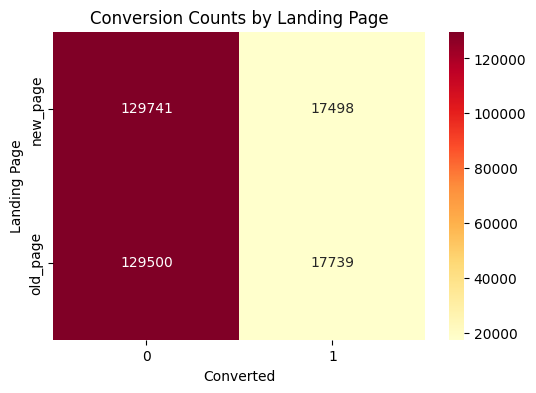

In [11]:
contingency_page = pd.crosstab(data['landing_page'], data['converted'])

plt.figure(figsize=(6,4))
sns.heatmap(contingency_page, annot=True, fmt="d", cmap="YlOrRd")
plt.title("Conversion Counts by Landing Page")
plt.xlabel("Converted")
plt.ylabel("Landing Page")
plt.show()

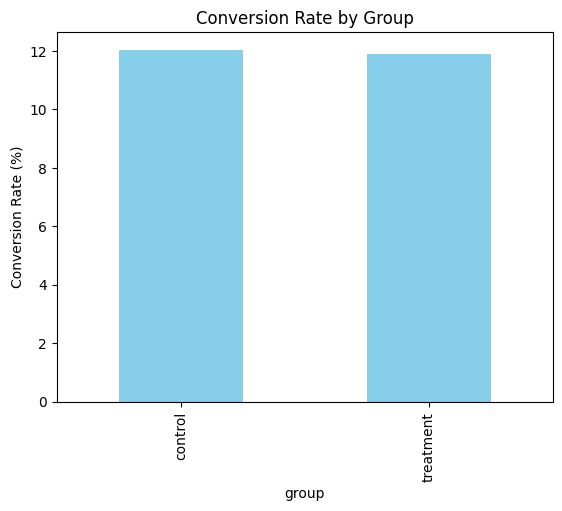

In [12]:
conv_rate = data.groupby('group')['converted'].mean() * 100
conv_rate.plot(kind='bar', color='skyblue')
plt.ylabel("Conversion Rate (%)")
plt.title("Conversion Rate by Group")
plt.show()

In [13]:
data['session_duration'] = np.random.randint(60, 600, size=len(data))

duration_control = data[data['group'] == 'control']['session_duration']
duration_treatment = data[data['group'] == 'treatment']['session_duration']

t_stat, p_val = stats.ttest_ind(duration_treatment, duration_control)
print(f"T-Test p-value: {p_val:.4f}")

T-Test p-value: 0.8848


C:\Users\SIRIVALLI REDDY\AppData\Local\Temp\ipykernel_7748\2736825665.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='group', y='session_duration', data=data, palette="Set2")


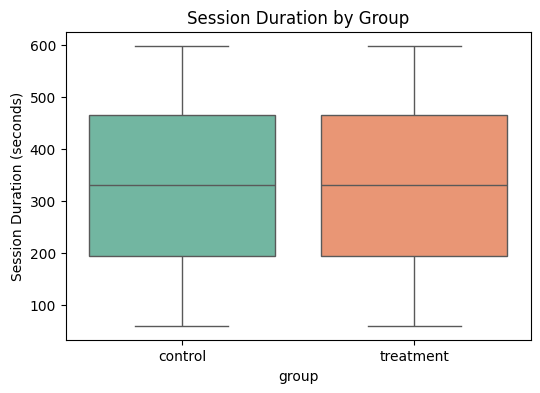

In [14]:
plt.figure(figsize=(6,4))
sns.boxplot(x='group', y='session_duration', data=data, palette="Set2")
plt.title("Session Duration by Group")
plt.ylabel("Session Duration (seconds)")
plt.show()

In [15]:
effect_size = 0.2   
power = 0.8         
alpha = 0.05       

analysis = TTestIndPower()
sample_size = analysis.solve_power(effect_size, power=power, alpha=alpha)
print(f"Required sample per group: {int(sample_size)}")


Required sample per group: 393


In [16]:
data

,user_id,timestamp,group,landing_page,converted,session_duration
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,313
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,455
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,199
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,288
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,141
...,...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0,137
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0,276
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0,533
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0,140


In [17]:
# Separate groups
duration_control = data[data['group']=='control']['session_duration']
duration_treatment = data[data['group']=='treatment']['session_duration']

# T-test
t_stat, p_val = stats.ttest_ind(duration_treatment, duration_control)
print(f"T-Test statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")


T-Test statistic: -0.1449
P-value: 0.8848
